In [1]:
## imports
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
#from tensorpac import Pac # -> may need https://github.com/EtienneCmb/tensorpac installed to properly plot


In [2]:
## read in pac data
data_path = os.getcwd()
with open(os.path.join(data_path,'pacData_7a.npy'), 'rb') as f:
    pac = np.load(f)

# load in pac object for plotting    
with open(os.path.join(data_path, 'pacObj_7a.pkl'), 'rb') as f:
    p = pickle.load(f)

#### PAC data organization
"pacData_7a.npy" contains a list "pac" with each item corresponding to a treatment condition: \
pac[0] -> OFF Pre-op \
pac[1] -> OFF Post-op (first trial) \
pac[2] -> OFF Post-op (last trial) \
pac[3] -> DCS-P2 

Each item is a numpy array of the following shape: \
(channels, amplitudes, phases, trials) \
Here, there are: \
2 channels (left and right STN) \
55 amplitude bins \
37 phase bins \
6 trials (straight line walks)


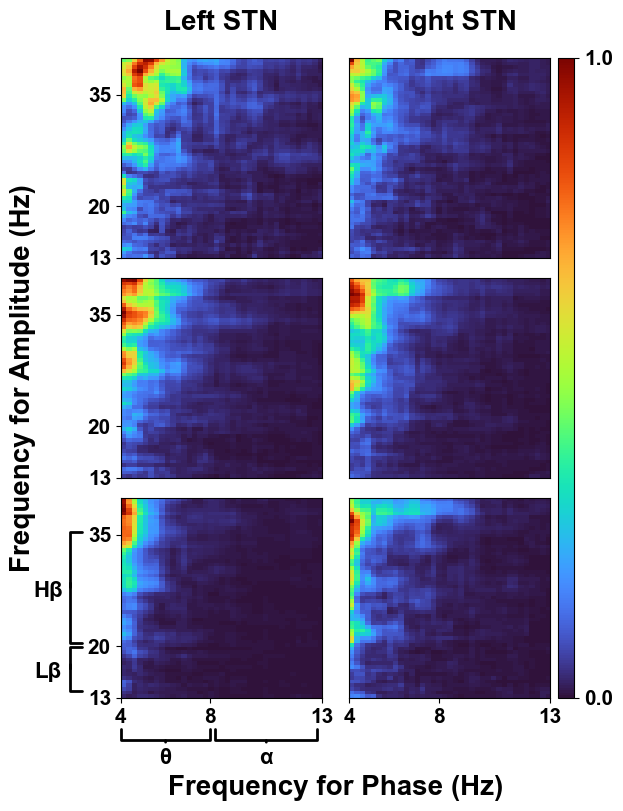

In [3]:
## Plot PAC Diagrams for Figure 7a

plt.rcParams["font.family"] = "Arial"
n_rows = 3
n_cols = 2
kw = dict(vmin=0, vmax=1, cmap='turbo')

fig, axs = plt.subplots(n_rows,n_cols, figsize=(8,16/6*n_rows))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Frequency for Phase (Hz)', fontsize=20, labelpad=40, weight='bold')
plt.ylabel('Frequency for Amplitude (Hz)', fontsize=20, labelpad=40, weight='bold')

N = 0

for n in range(len(pac)):#, ts in enumerate(trial_sel):
        
    if n == 1: #combine OFF Post-op trials
        pac_temp_left = np.concatenate((pac[n][0],pac[n+1][0]), axis=-1).mean(-1)
        pac_temp_right = np.concatenate((pac[n][1],pac[n+1][1]), axis=-1).mean(-1)   
    else:
        pac_temp_left = pac[n][0].mean(-1) # take mean for plotting
        pac_temp_right = pac[n][1].mean(-1)
        
    pac_temp_left_norm = (pac_temp_left - pac_temp_left.min()) / (pac_temp_left.max() - pac_temp_left.min())
    pac_temp_right_norm = (pac_temp_right - pac_temp_right.min()) / (pac_temp_right.max() - pac_temp_right.min())
    
                
    if n == 2: #only plot with combined OFF Post-op  
        continue
    
    
    if N == 0:
        ptlt_left = 'Left STN'
        ptlt_right = 'Right STN'
        ptlt_size = 20
    else:
        ptlt_left = ''
        ptlt_right = ''
        ptlt_size = 0
    
        
    plt.sca(axs[N, 0])
    p.comodulogram(pac_temp_left_norm, **kw, colorbar=False, ylabel='',
                      xlabel='', fz_title=ptlt_size)
    if N == 0:
        plt.title('Left STN', pad=20, fontsize=20, weight='bold')
        
        
    plt.sca(axs[N, 1])
    
    p.comodulogram(pac_temp_right_norm, **kw, colorbar=False, ylabel='',
                      xlabel='', fz_title=ptlt_size)
    if N == 0:
        plt.title('Right STN', pad=20, fontsize=20, weight='bold')
    
    if N == n_rows-1:
        axs[N, 0].set_xticks([4,8,13])
        axs[N, 0].set_xticklabels([4,8,13],fontsize=15, weight='bold')
        axs[N, 1].set_xticks([4,8,13])
        axs[N, 1].set_xticklabels([4,8,13],fontsize=15, weight='bold')
        
        axs[N, 0].annotate('θ', weight='bold', xy=(2/9, -0.2), xytext=(2/9, -0.35),
            fontsize=16, ha='center', va='bottom', xycoords='axes fraction',
            #bbox=dict(boxstyle='square', fc='0.8'),
            arrowprops=dict(arrowstyle='-[, widthB=2., lengthB=.5', lw=2.0))
        
        axs[N, 0].annotate('α', weight='bold', xy=(6.5/9, -0.2), xytext=(6.5/9, -0.35),
            fontsize=16, ha='center', va='bottom', xycoords='axes fraction',
            #bbox=dict(boxstyle='square', fc='0.8'),
            arrowprops=dict(arrowstyle='-[, widthB=2.3, lengthB=.5', lw=2.0))
        
        axs[N, 0].annotate(' ', weight='bold', xy=(-0.25, 3.5/27), xytext=(-0.25, 3.5/27),
            fontsize=16, ha='center', va='bottom', xycoords='axes fraction',
            #bbox=dict(boxstyle='square', fc='0.8'),
            arrowprops=dict(arrowstyle='-[, widthB=1, lengthB=.5, angleB=90', lw=2.0))
        axs[N, 0].text(0.75, 16.5,'Lβ',weight='bold', 
            fontsize=16, ha='center', va='center')
        
        axs[N, 0].annotate(' ', weight='bold', xy=(-0.25, 14.5/27), xytext=(-0.25, 14.5/27),
            fontsize=16, ha='center', va='bottom', xycoords='axes fraction',
            #bbox=dict(boxstyle='square', fc='0.8'),
            arrowprops=dict(arrowstyle='-[, widthB=2.5, lengthB=.5, angleB=90', lw=2.0))
        axs[N, 0].text(0.75, 27.5,'Hβ',weight='bold', 
            fontsize=16, ha='center', va='center')
        
        
    else:
        axs[N, 0].set_xticks([])
        axs[N, 0].set_xticks([], minor=True)
        axs[N, 1].set_xticks([])
        axs[N, 1].set_xticks([], minor=True)
        
    axs[N, 0].set_yticks([13, 20, 35])
    axs[N, 0].set_yticklabels([13, 20, 35], fontsize=15, weight='bold')
    
    axs[N, 1].set_yticks([])
    N = N + 1
    
plt.tight_layout()
plt.subplots_adjust(bottom=0.1, right=0.84, top=0.9, hspace=0.1)  
cax = plt.axes((0.85, 0.1, 0.02, 0.8))
cbar = plt.colorbar(cax=cax, ticks=[0.0,1.0])
cbar.ax.set_yticklabels([0.0,1.0],fontsize=15, weight='bold')


plt.show()